# Desviación estándar paso a paso con Python

Este notebook te guiará para entender cómo se calcula e interpreta la desviación estándar.  
Utilizaremos un ejemplo de producción en una embotelladora y visualizaremos todo el proceso.

✅ Requisitos:
- Saber qué es una media (promedio)
- Tener curiosidad por entender la variabilidad en los datos

## 1. Cargar librerías necesarias
Usaremos pandas para manejar los datos, y matplotlib/seaborn para visualizarlos.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Cargar el dataset

Vamos a cargar los datos de la producción de litros por lote/sucursal.

In [3]:
df = pd.read_csv('data/data.csv')
df.head()

,fecha,cantidad_litros,lote,sucursal_fabricada,tipo_producto,turno,responsable,temperatura_externa
0,2022-01-01,9340,L571,Sucursal C,Agua,Tarde,RS4,27.6
1,2022-01-02,8666,L325,Sucursal B,Refresco,Noche,RS1,26.6
2,2022-01-02,10335,L135,Sucursal C,Agua,Tarde,RS5,30.1
3,2022-01-03,9421,L418,Sucursal A,Jugo,Noche,RS3,25.8
4,2022-01-03,10280,L410,Sucursal B,Agua,Tarde,RS4,25.6


## 3. Estadísticos clave

Aquí vamos a calcular:
- La media (promedio)
- La mediana
- La desviación estándar poblacional

In [22]:
media = df['cantidad_litros'].mean()
mediana = df['cantidad_litros'].median()
std_dev_p = df['cantidad_litros'].std(ddof=0)

#aquí definimos 2 desviaciones standard como límites
limite_superior = media + (2*std_dev_p)
limite_inferior = media - (2*std_dev_p)

#creamos el rango considerado "fuera de límites"
fuera_de_limites = (
    (df["cantidad_litros"] > limite_superior) |
    (df["cantidad_litros"] < limite_inferior)
)

In [18]:
print(f"media: {media}, mediana: {mediana}, desviación estándar {std_dev_p}" )

media: 9998.91661594644, mediana: 10023.0, desviación estándar 1196.7094958738053


## 4. ¿Nuestros datos se distribuyen de forma normal?

Vamos a graficar un histograma con una curva de densidad para ver si tiene forma de campana.

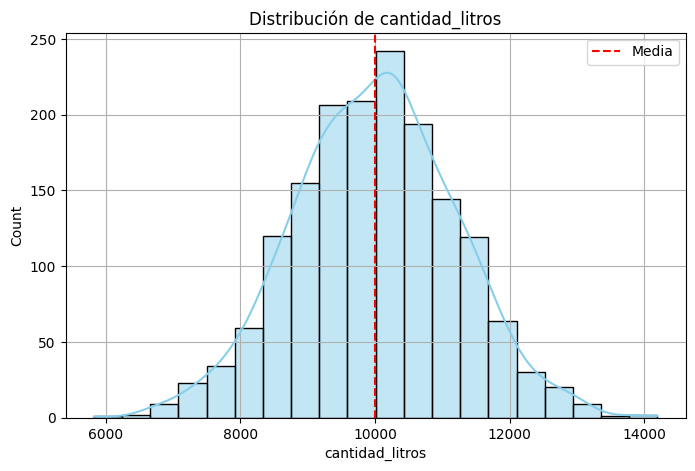

In [19]:
plt.figure(figsize=(8, 5))
sns.histplot(df["cantidad_litros"], kde=True, bins=20, color='skyblue')
plt.axvline(df["cantidad_litros"].mean(), color='red', linestyle='--', label='Media')
plt.legend()
plt.grid(True)
plt.title("Distribución de cantidad_litros")
plt.show()

## 5. Coeficiente de variación

Este valor nos dice cuánto varían los datos con respecto a la media, en porcentaje.

In [20]:
coeficiente_variacion = (std_dev_p / media) * 100
coeficiente_variacion

np.float64(11.968391595198153)

## 6. Grafica de outliers

Creamos una visualización para facilitar la detección de anormalías

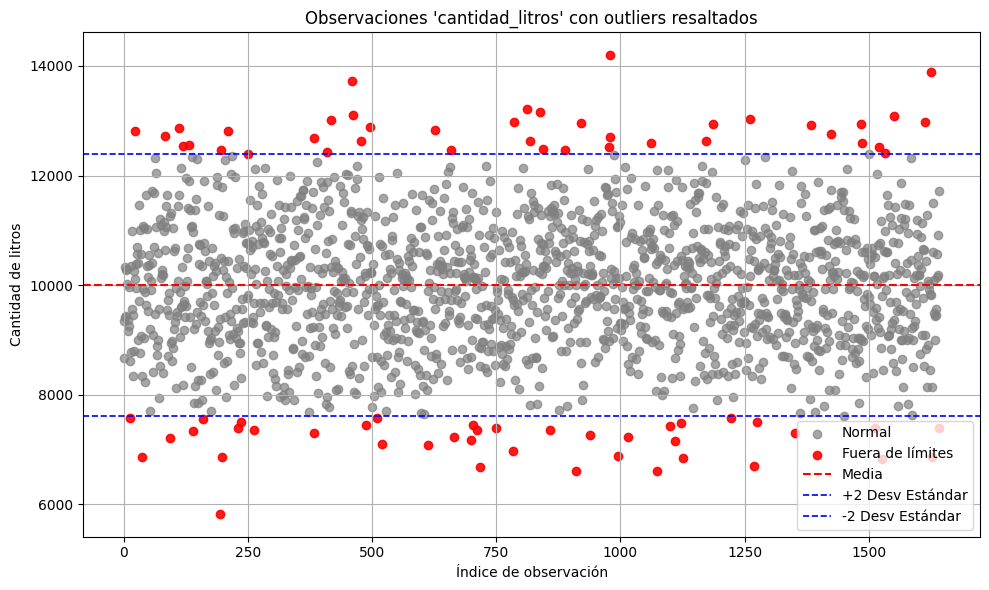

In [23]:
# Crear gráfico base
plt.figure(figsize=(10, 6))

# Puntos normales (gris)
plt.scatter(df.index[~fuera_de_limites], df["cantidad_litros"][~fuera_de_limites], 
            alpha=0.7, label="Normal", color='gray')

# Puntos fuera de límites (rojo)
plt.scatter(df.index[fuera_de_limites], df["cantidad_litros"][fuera_de_limites], 
            alpha=0.9, label="Fuera de límites", color='red')


# Líneas de referencia
plt.axhline(media, color='red', linestyle='--', linewidth=1.5, label='Media') #Promedio
plt.axhline(limite_superior, color='blue', linestyle='--', linewidth=1.2, label='+2 Desv Estándar') #límite superior
plt.axhline(limite_inferior, color='blue', linestyle='--', linewidth=1.2, label='-2 Desv Estándar') #límite inferior

# Estética
plt.title("Observaciones 'cantidad_litros' con outliers resaltados")
plt.xlabel("Índice de observación")
plt.ylabel("Cantidad de litros")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## 7. Data final con anomalías

Este dataframe (tabla) incluye todas las filas consideradas como anomalías, este será nuestro punto de partida para análisis más profundos.

In [26]:
#indicador de outliers
outliers_mask = (df["cantidad_litros"] > limite_superior) | (df["cantidad_litros"] < limite_inferior)

#creamos una copia para no eliminar el df original
df_outliers = df[outliers_mask].copy()

#Agregar columnas de análisis
df_outliers["diferencia_con_media"] = df_outliers["cantidad_litros"] - media
df_outliers["tipo_outlier"] = df_outliers["diferencia_con_media"].apply(
    lambda x: "Arriba del límite" if x > 0 else "Debajo del límite"
)

# Reordenar columnas: poner primero fecha, sucursal y lote (si existen en el DataFrame)
columnas_principales = ["fecha", "sucursal_fabricada", "lote"]
columnas_restantes = [col for col in df_outliers.columns if col not in columnas_principales and col != 'index']

# Nueva organización de columnas (descartamos el index antiguo si se agregó)
df_outliers = df_outliers[columnas_principales + columnas_restantes]
# Mostrar el resultado
df_outliers

,fecha,sucursal_fabricada,lote,cantidad_litros,tipo_producto,turno,responsable,temperatura_externa,diferencia_con_media,tipo_outlier
13,2022-01-09,Sucursal A,L417,7568,Refresco,Tarde,RS2,30.6,-2430.916616,Debajo del límite
22,2022-01-15,Sucursal A,L576,12809,Refresco,Mañana,RS5,30.4,2810.083384,Arriba del límite
36,2022-01-24,Sucursal C,L693,6856,Jugo,Mañana,RS5,29.1,-3142.916616,Debajo del límite
82,2022-02-22,Sucursal B,L434,12728,Agua,Mañana,RS5,25.7,2729.083384,Arriba del límite
93,2022-02-28,Sucursal A,L198,7218,Jugo,Noche,RS2,23.7,-2780.916616,Debajo del límite
...,...,...,...,...,...,...,...,...,...,...
1550,2024-10-26,Sucursal B,L309,13084,Agua,Mañana,RS1,18.2,3085.083384,Arriba del límite
1613,2024-12-11,Sucursal C,L169,12982,Refresco,Mañana,RS2,26.3,2983.083384,Arriba del límite
1625,2024-12-19,Sucursal C,L594,13892,Refresco,Mañana,RS1,36.5,3893.083384,Arriba del límite
1627,2024-12-20,Sucursal C,L636,6857,Agua,Mañana,RS3,18.0,-3141.916616,Debajo del límite


## Conclusión

Con estos pasos pudimos:
- Visualizar la forma de los datos
- Calcular y entender la desviación estándar
- Medir cuánto varían nuestras observaciones en términos porcentuales
- Crear una visualización para detectar anomalías de manera sencilla
- Creamos un dataframe con las anomalías e información relevante para profundizar nuestro análisis.

Este método puede aplicarse en cualquier industria para detectar valores fuera de lo común, definir límites de alerta, y mucho más. 
Ten en cuenta que los datos deben de presentar una distribución normal para evitar errores de interpretación.